In [1]:
import numpy as np # Importa a biblioteca numpy e lhe atribue o alias np
import pandas as pd # Importa a biblioteca pandas e lhe atribue o alias pd
import matplotlib.pyplot as plt # Importa o modulo pyplot da biblioteca matplotlib e lhe atribue o alias plt
from matplotlib.ticker import MaxNLocator # Importa a classe MaxNLocator do modulo ticker da biblioteca matplotlib
from collections import namedtuple # Importa namedtuple da biblioteca collections
%matplotlib inline

In [ ]:
# Observação: O conjunto de dados utilizado foi referente ao titanic

In [2]:
df = pd.read_csv("train.csv") # Lê o arquivo train.csv e armazena o conteudo na variavel df
df.head() # Exibe as cinco primeiras linhas do arquivo train.csv

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
media_idade = df["Age"].mean() # Calcula a média das idades e armazena o valor na variavel media_idade
df["Age"] = df["Age"].fillna(media_idade) # Preenche os valores ausentes da coluna Age com a média das idades

colunas analisadas: Pclass, Age, Sex, Survived

Perguntas
1. Quais as principais caracteristicas que proporcionaram a determinadas pessoas serem mais propensas sobreviver?
2. Pessoas de um certo tipo de sexo foram mais propensas a sobreviver?
3. Pessoas em uma certa faixa de idade foram mais propensas a sobreviver?
4. Pessoas de um certo tipo de classe foram mais propensas a sobreviver?

Resposta para a pergunta 01:
As caracteristicas que proporcionaram a determinadas pessoas serem mais propensas a sobreviver foram idade se maior ou igual a idade mediana, sexo se feminino e classe se upper. 

In [4]:
def percentual(fracao, total=891):
    """
        Função que retorna o percentual correspondente
        de uma amostra em um total de registros.
        Arguments:
            fracao: Quantidade de amostras.
            total: Total de registros.
        Return:
            Um número float correspondente ao percentual de uma amostra
            em um total de registros.
    """
    return (fracao * 100) / total

In [5]:
def pie(explode, labels, sizes):
    """
        Função que gera gráfico de pizza.
        Arguments:
            explode: O espaçamento de cada parte do gráfico.
            labels: O rotulo de cada parte do gráfico.
            sizes: O percentual de cada parte do gráfico.
        Return:
            Nenhum.
    """
    explode = explode

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
    ax1.axis('equal')

    plt.show()

In [6]:
def bar(n_groups, vals_bar_1, vals_bar_2, std, label_bar_1, label_bar_2, 
        color_bar_1, color_bar_2, xlabel, ylabel, title, xticklabels):
    """
        Função que gera gráfico de barras.
        Arguments:
            n_groups: A quantidade de grupos no gráfico.
            vals_bar_1: Os valores da primeira barra de cada grupo no gráfico.
            vals_bar_2: Os valores da segunda barra de cada grupo no gráfico.
            std: O tamanho do traço vertical em cima de cada barra dos grupos no gráfico.
            label_bar_1: O rotulo da primeira barra de cada grupo no gráfico.
            label_bar_2: O rotulo da segunda barra de cada grupo no gráfico.
            color_bar_1: A cor da primeira barra de cada grupo no gráfico.
            color_bar_2: A cor da segunda barra de cada grupo no gráfico.
            xlabel: O rotulo do eixo x do gráfico.
            ylabel: O rotulo do eixo y do gráfico.
            title: O titulo do gráfico.
            xticklabels: O rotulo de cada grupo no gráfico.
        Return:
            Nenhum.
    """
    
    fig, ax = plt.subplots()

    index = np.arange(n_groups)
    bar_width = 0.35

    opacity = 0.4
    error_config = {'ecolor': '0.3'}

    rects1 = ax.bar(index, vals_bar_1, bar_width,
                    alpha=opacity, color=color_bar_1,
                    yerr=std, error_kw=error_config,
                    label=label_bar_1)

    rects2 = ax.bar(index + bar_width, vals_bar_2, bar_width,
                    alpha=opacity, color=color_bar_2,
                    yerr=std, error_kw=error_config,
                    label=label_bar_2)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(xticklabels)
    ax.legend()

    fig.tight_layout()
    plt.show()
    

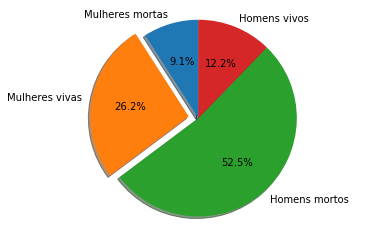

In [7]:
qtd_m_mortas = df.query("Sex == 'female' and Survived == 0")["Sex"].count() # Quantidade de mulheres mortas
qtd_m_vivas = df.query("Sex == 'female' and Survived == 1")["Sex"].count() # Quantidade de mulheres vivas

qtd_h_mortos = df.query("Sex == 'male' and Survived == 0")["Sex"].count() # Quantidade de homens mortos
qtd_h_vivos = df.query("Sex == 'male' and Survived == 1")["Sex"].count() # Quantidade de homens vivos

perc_m_mortas = percentual(qtd_m_mortas) # Percentual de mulheres mortas
perc_m_vivas = percentual(qtd_m_vivas) # Percentual de mulheres vivas

perc_h_mortos = percentual(qtd_h_mortos) # Percentual de homens mortos
perc_h_vivos = percentual(qtd_h_vivos) # Percentual de homens vivos

explode = (0, 0.1, 0, 0)
labels = ["Mulheres mortas", "Mulheres vivas", "Homens mortos", "Homens vivos"]
sizes = [perc_m_mortas, perc_m_vivas, perc_h_mortos, perc_h_vivos]

pie(explode, labels, sizes) # Gera um gráfico de pizza com o percentual de mulheres e homens vivos e mortos

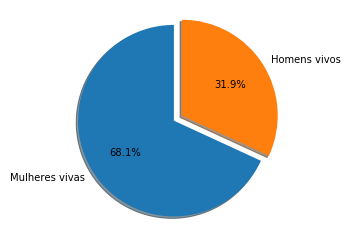

In [27]:
total_p_vivas = qtd_m_vivas + qtd_h_vivos # Quantidade total de pessoas vivas
perc_m_vivas = percentual(fracao=qtd_m_vivas, total=total_p_vivas) # Percentual de mulheres vivas
perc_h_vivos = percentual(fracao=qtd_h_vivos, total=total_p_vivas) # Percentual de homens vivos

explode = (0.1, 0)
labels = ["Mulheres vivas", "Homens vivos"]
sizes = [perc_m_vivas, perc_h_vivos]

pie(explode, labels, sizes) # Gera um gráfico de pizza com o percentual de mulheres e homens vivos

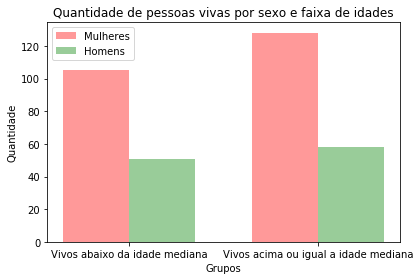

In [9]:
mediana = df["Age"].median() # Armazena a idade mediana na variavel mediana

# Quantidade de mulheres vivas com idade menor que a idade mediana
m_vivas_abaixo_mediana = df.query("Age < {} and Survived == 1 and Sex == 'female'".format(mediana))["Age"].count()
# Quantidade de homens vivos com idade menor que a idade mediana
h_vivos_abaixo_mediana = df.query("Age < {} and Survived == 1 and Sex == 'male'".format(mediana))["Age"].count()

# Quantidade de mulheres vivas com idade maior ou igual a idade mediana
m_vivas_acima_mediana = df.query("Age >= {} and Survived == 1 and Sex == 'female'".format(mediana))["Age"].count()
# Quantidade de homens vivos com idade maior ou igual a idade mediana
h_vivos_acima_mediana = df.query("Age >= {} and Survived == 1 and Sex == 'male'".format(mediana))["Age"].count()

qtd_women = (m_vivas_abaixo_mediana, m_vivas_acima_mediana) # Os valores da primeira barra de cada grupo
qtd_men = (h_vivos_abaixo_mediana, h_vivos_acima_mediana) # Os valores da segunda barra de cada grupo

xticklabels = ('Vivos abaixo da idade mediana', 'Vivos acima ou igual a idade mediana') # Os rotulos de cada grupo

# Gera um gráfico de barras com a quantidade de mulheres e homens vivos com idade menor, maior ou igual a idade mediana
bar(2, qtd_women, qtd_men, (0, 0), 'Mulheres', 'Homens', 'r', 'g', 'Grupos', 'Quantidade', 
    'Quantidade de pessoas vivas por sexo e faixa de idades', xticklabels)

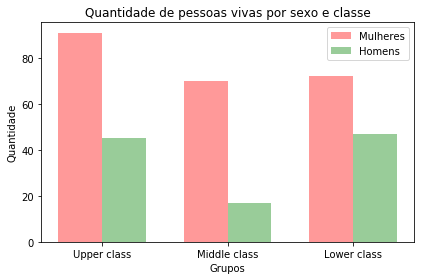

In [10]:
# Quantidade de mulheres vivas da classe upper
qtd_m_upper_class = df.query("Pclass == 1 and Survived == 1 and Sex == 'female'")["Pclass"].count()
# Quantidade de homens vivos da classe upper
qtd_h_upper_class = df.query("Pclass == 1 and Survived == 1 and Sex == 'male'")["Pclass"].count()

# Quantidade de mulheres vivas da classe middle
qtd_m_middle_class = df.query("Pclass == 2 and Survived == 1 and Sex == 'female'")["Pclass"].count()
# Quantidade de homens vivos da classe middle
qtd_h_middle_class = df.query("Pclass == 2 and Survived == 1 and Sex == 'male'")["Pclass"].count()

# Quantidade de mulheres vivas da classe lower
qtd_m_lower_class = df.query("Pclass == 3 and Survived == 1 and Sex == 'female'")["Pclass"].count()
# Quantidade de homens vivos da classe lower
qtd_h_lower_class = df.query("Pclass == 3 and Survived == 1 and Sex == 'male'")["Pclass"].count()

qtd_women = (qtd_m_upper_class, qtd_m_middle_class, qtd_m_lower_class) # Os valores da primeira barra de cada grupo
qtd_men = (qtd_h_upper_class, qtd_h_middle_class, qtd_h_lower_class) # Os valores da segunda barra de cada grupo

xticklabels = ('Upper class', 'Middle class', 'Lower class') # Os rotulos de cada grupo

# Gera um gráfico de barras com a quantidade de mulheres e homens vivos de cada classe
bar(3, qtd_women, qtd_men, (0, 0, 0), 'Mulheres', 'Homens', 'r', 'g', 'Grupos', 'Quantidade', 
    'Quantidade de pessoas vivas por sexo e classe', xticklabels)

Resposta para a pergunta 02:
De acordo com os gráficos acima pessoas do sexo feminino foram mais propensas a sobreviver. 

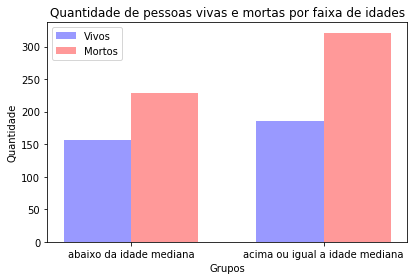

In [11]:
mediana = df["Age"].median() # Armazena a idade mediana na variavel mediana

# Quantidade de pessoas vivas com idade menor que a idade mediana 
vivos_abaixo_mediana = df.query("Age < {} and Survived == 1".format(mediana))["Age"].count()
# Quantidade de pessoas mortas com idade menor que a idade mediana
mortos_abaixo_mediana = df.query("Age < {} and Survived == 0".format(mediana))["Age"].count()

# Quantidade de pessoas vivas com idade maior ou igual a idade mediana
vivos_acima_mediana = df.query("Age >= {} and Survived == 1".format(mediana))["Age"].count()
# Quantidade de pessoas mortas com idade maior ou igual a idade mediana
mortos_acima_mediana = df.query("Age >= {} and Survived == 0".format(mediana))["Age"].count()

qtd_vivos = (vivos_abaixo_mediana, vivos_acima_mediana) # Os valores da primeira barra de cada grupo
qtd_mortos = (mortos_abaixo_mediana, mortos_acima_mediana) # Os valores da segunda barra de cada grupo

xticklabels = ('abaixo da idade mediana', 'acima ou igual a idade mediana') # Os rotulos de cada grupo

# Gera um gráfico de barras com a quantidade de pessoas vivas e mortas com idade menor, maior ou igual a idade mediana
bar(2, qtd_vivos, qtd_mortos, (0, 0), 'Vivos', 'Mortos', 'b', 'r', 'Grupos', 'Quantidade', 
    'Quantidade de pessoas vivas e mortas por faixa de idades', xticklabels)

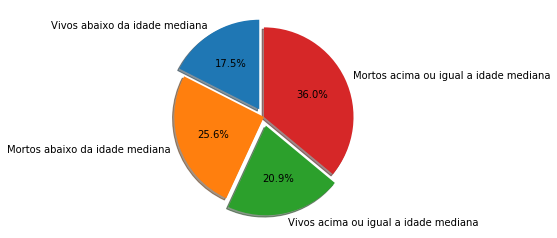

In [12]:
# Percentual de pessoas vivas com idade abaixo da idade mediana
perc_v_abaixo_mediana = percentual(vivos_abaixo_mediana)
# Percentual de pessoas mortas com idade abaixo da idade mediana
perc_m_abaixo_mediana = percentual(mortos_abaixo_mediana)

# Percentual de pessoas vivas com idade acima ou igual a idade mediana
perc_v_acima_mediana = percentual(vivos_acima_mediana)
# Percentual de pessoas mortas com idade acima ou igual a idade mediana
perc_m_acima_mediana = percentual(mortos_acima_mediana)

explode = (0.1, 0, 0.1, 0)
labels = []
labels.append("Vivos abaixo da idade mediana")
labels.append("Mortos abaixo da idade mediana")
labels.append("Vivos acima ou igual a idade mediana")
labels.append("Mortos acima ou igual a idade mediana")

sizes = [perc_v_abaixo_mediana, perc_m_abaixo_mediana, perc_v_acima_mediana, perc_m_acima_mediana]

# Gera um gráfico de pizza com o percentual de pessoas vivas e mortas com idade menor, maior ou igual a idade mediana
pie(explode, labels, sizes)

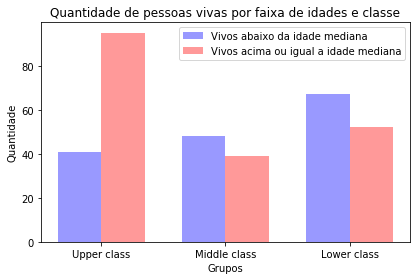

In [13]:
# Quantidade de pessoas vivas da classe upper com idade menor que a idade mediana
vivos_upper_abaixo_mediana = df.query("Age < {} and Pclass == 1 and Survived == 1".format(mediana))["Age"].count()
# Quantidade de pessoas vivas da classe upper com idade maior ou igual a idade mediana
vivos_upper_acima_mediana = df.query("Age >= {} and Pclass == 1 and Survived == 1".format(mediana))["Age"].count()

# Quantidade de pessoas vivas da classe middle com idade menor que a idade mediana
vivos_middle_abaixo_mediana = df.query("Age < {} and Pclass == 2 and Survived == 1".format(mediana))["Age"].count()
# Quantidade de pessoas vivas da classe middle com idade maior ou igual a idade mediana
vivos_middle_acima_mediana = df.query("Age >= {} and Pclass == 2 and Survived == 1".format(mediana))["Age"].count()

# Quantidade de pessoas vivas da classe lower com idade menor que a idade mediana
vivos_lower_abaixo_mediana = df.query("Age < {} and Pclass == 3 and Survived == 1".format(mediana))["Age"].count()
# Quantidade de pessoas vivas da classe lower com idade maior ou igual a idade mediana
vivos_lower_acima_mediana = df.query("Age >= {} and Pclass == 3 and Survived == 1".format(mediana))["Age"].count()

# Os valores da primeira barra de cada grupo
qtd_vivos_abaixo_mediana = (vivos_upper_abaixo_mediana, vivos_middle_abaixo_mediana, vivos_lower_abaixo_mediana)
# Os valores da segunda barra de cada grupo
qtd_vivos_acima_mediana = (vivos_upper_acima_mediana, vivos_middle_acima_mediana, vivos_lower_acima_mediana)

xticklabels = ('Upper class', 'Middle class', 'Lower class') # Os rotulos de cada grupo

# Gera um gráfico de barras com a quantidade de pessoas vivas de cada classe e
# com idade menor, maior ou igual a idade mediana
bar(3, qtd_vivos_abaixo_mediana, qtd_vivos_acima_mediana, (0, 0, 0), 'Vivos abaixo da idade mediana', 
    'Vivos acima ou igual a idade mediana', 'b', 'r', 'Grupos', 'Quantidade', 
    'Quantidade de pessoas vivas por faixa de idades e classe', xticklabels)

Resposta para a pergunta 03:
De acordo com a maioria dos gráficos acima pessoas acima ou igual a idade mediana foram mais propensas a sobreviver.

Text(0,0.5,'Quantidade')

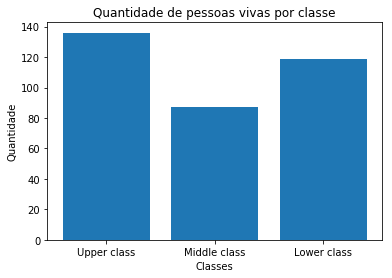

In [14]:
# Quantidade de pessoas vivas da classe upper
qtd_p_upper_class = df.query("Pclass == 1 and Survived == 1")["Pclass"].count()
# Quantidade de pessoas vivas da classe middle
qtd_p_middle_class = df.query("Pclass == 2 and Survived == 1")["Pclass"].count()
# Quantidade de pessoas vivas da classe lower
qtd_p_lower_class = df.query("Pclass == 3 and Survived == 1")["Pclass"].count()

locations = [1, 2, 3]
heights = [qtd_p_upper_class, qtd_p_middle_class, qtd_p_lower_class]
labels = ['Upper class', 'Middle class', 'Lower class']
# Gera um gráfico de barras com três classes
plt.bar(locations, heights, tick_label=labels)
plt.title('Quantidade de pessoas vivas por classe')
plt.xlabel('Classes')
plt.ylabel('Quantidade')

Resposta para a pergunta 03:
De acordo com o gráfico acima pessoas da classe upper foram mais propensas a sobreviver. 

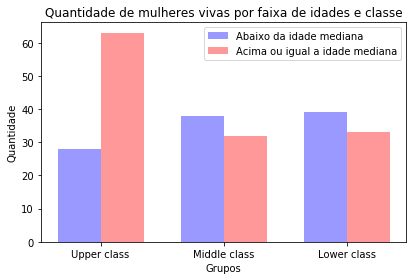

In [28]:
mediana = df["Age"].median() # Armazena a idade mediana na variavel mediana

# Quantidade de mulheres vivas com idade menor que a idade mediana da classe upper
qtd_m_upper_abaixo_med = df.query("Sex == 'female' and Age < @mediana and Pclass == 1 and Survived == 1")["Sex"].count()
# Quantidade de mulheres vivas com idade maior ou igual a idade mediana da classe upper
qtd_m_upper_acima_med = df.query("Sex == 'female' and Age >= @mediana and Pclass == 1 and Survived == 1")["Sex"].count()

# Quantidade de mulheres vivas com idade menor que a idade mediana da classe middle
qtd_m_middle_abaixo_med = df.query("Sex == 'female' and Age < @mediana and Pclass == 2 and Survived == 1")["Sex"].count()
# Quantidade de mulheres vivas com idade maior ou igual a idade mediana da classe middle
qtd_m_middle_acima_med = df.query("Sex == 'female' and Age >= @mediana and Pclass == 2 and Survived == 1")["Sex"].count()

# Quantidade de mulheres vivas com idade menor que a idade mediana da classe lower
qtd_m_lower_abaixo_med = df.query("Sex == 'female' and Age < @mediana and Pclass == 3 and Survived == 1")["Sex"].count()
# Quantidade de mulheres vivas com idade maior ou igual a idade mediana da classe lower
qtd_m_lower_acima_med = df.query("Sex == 'female' and Age >= @mediana and Pclass == 3 and Survived == 1")["Sex"].count()

# Os valores da primeira barra de cada grupo
qtd_m_vivas_abaixo_med = [qtd_m_upper_abaixo_med, qtd_m_middle_abaixo_med, qtd_m_lower_abaixo_med]
# Os valores da segunda barra de cada grupo
qtd_m_vivas_acima_med = [qtd_m_upper_acima_med, qtd_m_middle_acima_med, qtd_m_lower_acima_med]

xticklabels = ('Upper class', 'Middle class', 'Lower class') # Os rotulos de cada grupo

# Gera um gráfico de barras com a quantidade de mulheres vivas de cada classe e
# com idade menor, maior ou igual a idade mediana
bar(3, qtd_m_vivas_abaixo_med, qtd_m_vivas_acima_med, (0, 0, 0), 'Abaixo da idade mediana', 
    'Acima ou igual a idade mediana', 'b', 'r', 'Grupos', 'Quantidade', 
    'Quantidade de mulheres vivas por faixa de idades e classe', xticklabels)

Resposta para a pergunta 01:
De acordo com o gráfico acima mulheres com idade acima ou igual a idade mediana da classe upper foram mais propensas a sobreviver. 